<center><h1>BoomBikes Demand Prediction</h1></center>

<h2>Problem Statement</h2>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

<ul>
    <li>Which variables are significant in predicting the demand for shared bikes.</li>
    <li>How well those variables describe the bike demands</li>
</ul>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


<h2>Business Goal:</h2>

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<h2>Dataset characteristics:</h2>
<table>
    <tr><th style="text-align:center">instant</th><th style="text-align:center">record index</th></tr>
	<tr><td style="text-align:center">dteday</td><td style="text-align:left">date</td></tr>
	<tr><td style="text-align:center">season</td><td style="text-align:left">season (1:spring, 2:summer, 3:fall, 4:winter)</td></tr>
	<tr><td style="text-align:center">yr</td><td style="text-align:left">year (0: 2018, 1:2019)</td></tr>
	<tr><td style="text-align:center">mnth</td><td style="text-align:left">month ( 1 to 12)</td></tr>
	<tr><td style="text-align:center">holiday</td><td style="text-align:left">weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)</td></tr>
	<tr><td style="text-align:center">weekday</td><td style="text-align:left">day of the week</td></tr>
	<tr><td style="text-align:center">workingday</td><td style="text-align:left">if day is neither weekend nor holiday is 1, otherwise is 0.</td></tr>
	<tr><td style="text-align:center">weathersit</td><td style="text-align:left">
        1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</td></tr>
	<tr><td style="text-align:center">temp</td><td style="text-align:left">temperature in Celsius</td></tr>
	<tr><td style="text-align:center">atemp</td><td style="text-align:left">feeling temperature in Celsius</td></tr>
	<tr><td style="text-align:center">hum</td><td style="text-align:left">humidity</td></tr>
	<tr><td style="text-align:center">windspeed</td><td style="text-align:left">wind speed</td></tr>
	<tr><td style="text-align:center">casual</td><td style="text-align:left">count of casual users</td></tr>
	<tr><td style="text-align:center">registered</td><td style="text-align:left">count of registered users</td></tr>
	<tr><td style="text-align:center">cnt</td><td style="text-align:left">count of total rental bikes including both casual and registered</td></tr>
    </table>

In [1]:
# import required packages
import numpy as np
import pandas as pd
import random
import calendar
import warnings
import seaborn as sns
import os.path
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
from matplotlib import cm
from matplotlib.font_manager import FontProperties
from matplotlib.collections import LineCollection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# surpress warnings
warnings.filterwarnings('ignore')

In [2]:
# import data from csv file
df = pd.read_csv("day.csv")

In [3]:
# import font awesome file and check if file exist to prevent error on execution
font_exists = os.path.exists("Font Awesome 5 Free-Solid-900.otf")
fp = FontProperties(fname=r"Font Awesome 5 Free-Solid-900.otf") 

In [4]:
#check the shape of the dataframe
df.shape

(730, 16)

In [5]:
# Preview the head of the datframe
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

# Data Cleaning

In [6]:
# check the datatypes and null columns for the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We don't have any null values in any of the features.

Lets validate and convert the datatypes of columns to appropriate format.

In [7]:
# converting dteday to datetime object
df.dteday = pd.to_datetime(df.dteday,format="%d-%m-%Y")

In [8]:
# On Analysis the day of the weekday columns seems to be having Monday as the first day of the week. 
# In our case the weekday starts with Sunday = 0, Monday = 1 ... Saturday = 6. 
# So we have to map the number in ordered days from Sunday to Saturday.
# making sunday as firstday of the week
#
# df.weekday = (df.dteday.dt.weekday + 1 ) % 7
# df.weekday.head(7)
#
# commented and not performing the above operation as per analysis from the calendar for the years 2018 and 2019 
# workingday, weekdays and holiday features are incorrectly mapped for the dteday so it might mislead
# the data for all these columns, instead we will drop dteday.

In [9]:
# dropping unncessary columns
df.drop(columns=['instant'],inplace=True) # instant is a record index variable which is not required for our analysis

In [10]:
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2018-01-01       1   0     1        0        6           0           2   
1 2018-01-02       1   0     1        0        0           0           2   
2 2018-01-03       1   0     1        0        1           1           1   
3 2018-01-04       1   0     1        0        2           1           1   
4 2018-01-05       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

Let look at the overview of the table value description

In [11]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

All the data looks good and error free now we can proceed to data visualtisation step

We can now visualize the dataset to understand the data better and observe patterns to get more insights and product a meaningful output

## EDA

Lets perform some EDA on our dataset

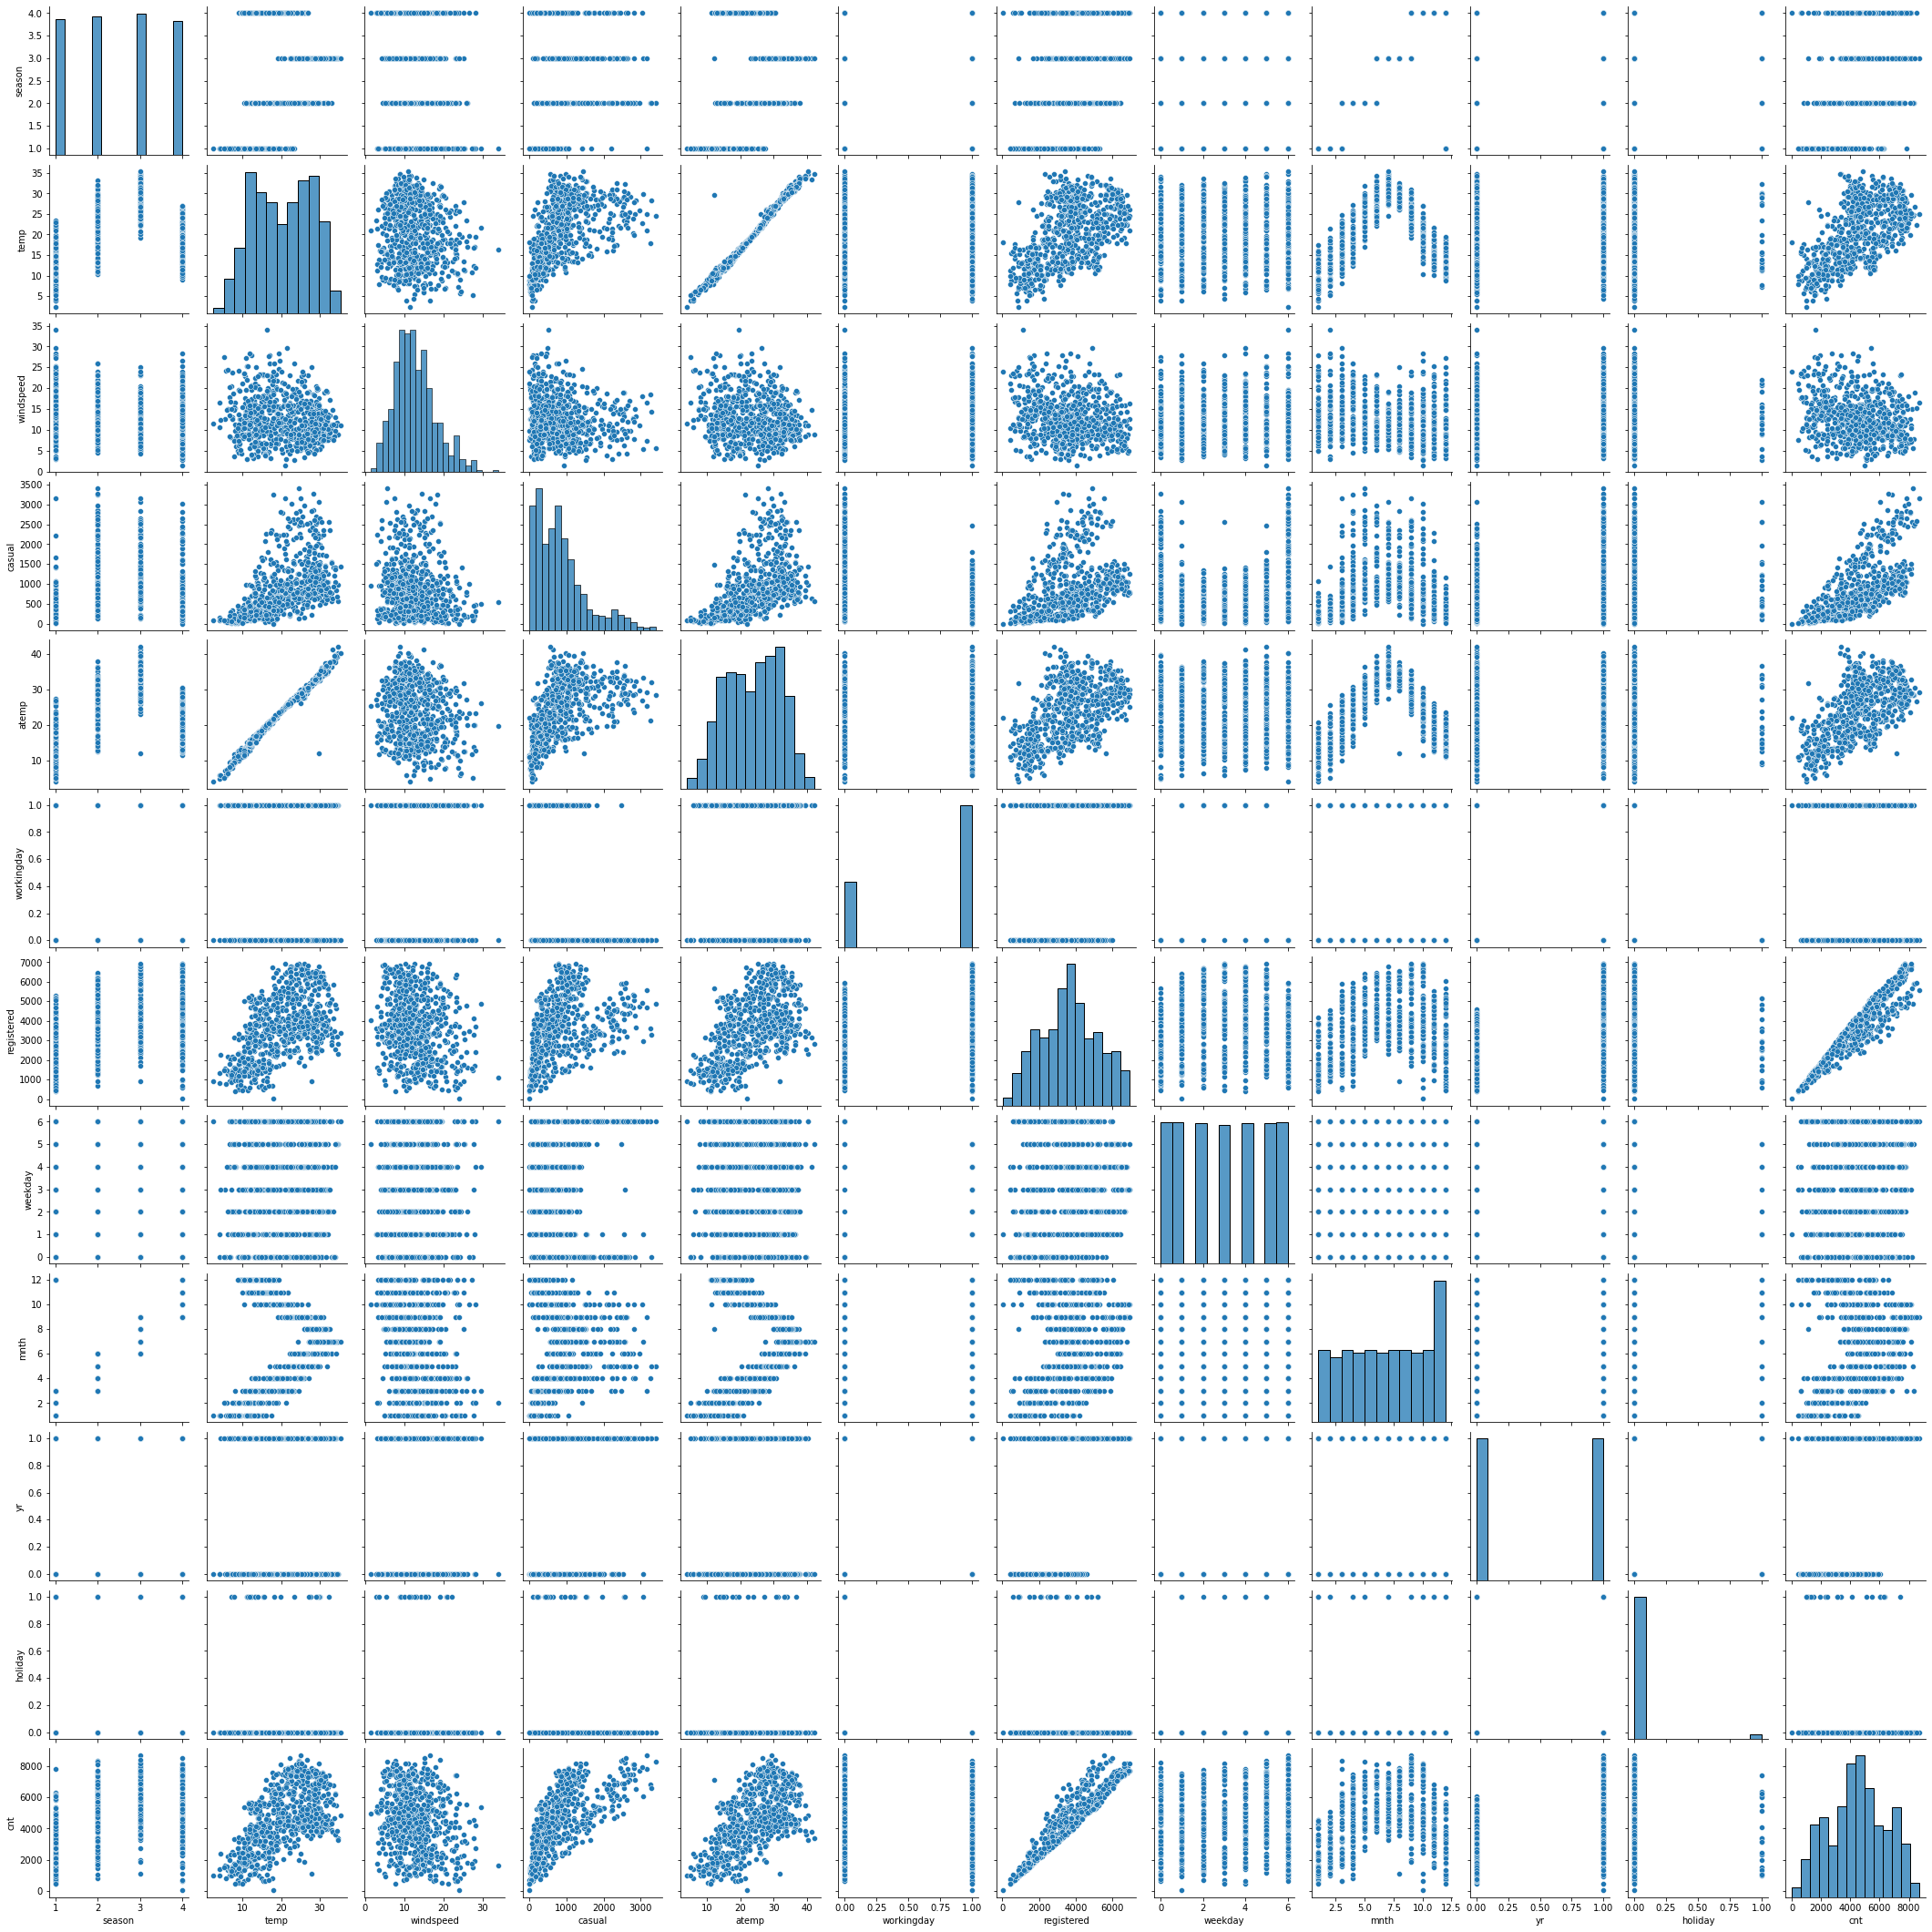

In [12]:
# let plot a pair plot to see how the relations are between feature values
sns.pairplot(df,vars=['season','temp','windspeed','casual','atemp','workingday','registered','weekday','mnth','yr','holiday','cnt']);

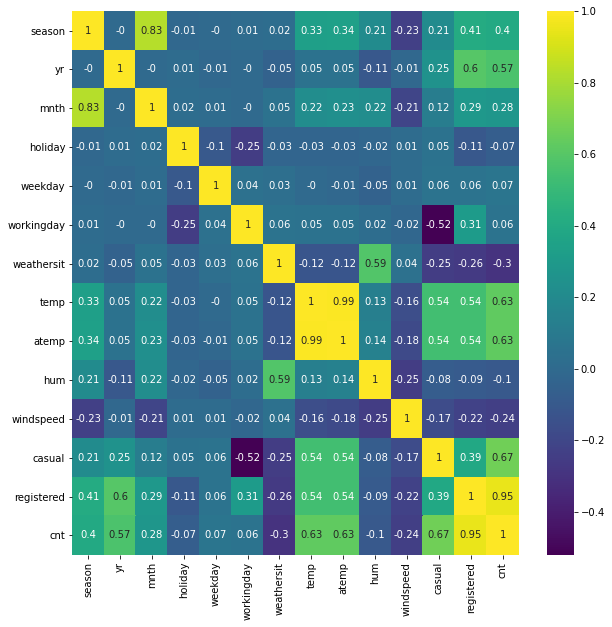

In [13]:
# set figure size
plt.figure(figsize=(10,10))

# plot heatmap for the correlation
sns.heatmap(round(df.corr(),2),annot=True,cmap="viridis");

**Drop Temp feature**

We can see that there is a high correlation between temp and atemp so lets drop temp feature from the dataset to prevent multicollinearity

In [14]:
columns_to_drop = []
columns_to_drop.append('temp')

## Convert to categorical columns

We have few categorical columns with numerical values. It would be better to apply the conventional name for visualisation

## Weekday

In [15]:
# assigning day names to day number of the week
# 0 sunday
# 1 monday
# ...
# 6 saturday

df.weekday = df.weekday.apply(lambda x: calendar.day_abbr[x-1]).astype('category')
df.weekday

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
725    Thu
726    Fri
727    Sat
728    Sun
729    Mon
Name: weekday, Length: 730, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

## Month

In [16]:
# set month abbrivation for month number
month_name = {i : calendar.month_abbr[i] for i in np.arange(1,13)}

# map the month names in the data set mnth column and set to categorical datatype
df.mnth = pd.Categorical(df.mnth.map(month_name),categories=[calendar.month_abbr[i] for i in np.arange(1,13)],ordered=True)

# deleting month_name variable as it is not required anymore
del month_name

We have four season numbers which can be changed to categorical column but before that lets name the feature values

## Season

In [17]:
# Create season mapping variable
season_name  = {1:'spring',2:'summer',3:'fall',4:'winter'}

# Mapping Season names for the number
df.season = df.season.map(season_name).astype("category")

# deleting season_name variable as it is not required anymore
del season_name

We have four type of weather that are recorder in numbers which can be added as a categorical feature. Hence lets name the feature values

## Weather

In [18]:
# Create weather mapping variable
weather_name = {1:'clear',2:'cloudy',3:'rain',4:'snow'}

# Mapping Season names for the number
df.weathersit = df.weathersit.map(weather_name).astype("category")

# deleting weather_name variable as it is not required anymore
del weather_name

## Creating derived column week_month

In [19]:
def week_in_month(dt):
    weekday_one = datetime.date(dt.year, dt.month, 1).weekday()
    weekday_day = datetime.date(dt.year, dt.month, dt.day).weekday()
    x=(dt.day - 1)//7 + 1 + (weekday_day < weekday_one)
    #print(x,' ',dt)
    return 'week '+str(x)

In [20]:
df['week_month']=df['dteday'].apply(week_in_month).astype('category')
df['week_month']

0      week 1
1      week 1
2      week 1
3      week 1
4      week 1
        ...  
725    week 5
726    week 5
727    week 5
728    week 6
729    week 6
Name: week_month, Length: 730, dtype: category
Categories (6, object): ['week 1', 'week 2', 'week 3', 'week 4', 'week 5', 'week 6']

In [21]:
df.head()

dteday  season  yr mnth  holiday weekday  workingday weathersit  \
0 2018-01-01  spring   0  Jan        0     Sat           0     cloudy   
1 2018-01-02  spring   0  Jan        0     Sun           0     cloudy   
2 2018-01-03  spring   0  Jan        0     Mon           1      clear   
3 2018-01-04  spring   0  Jan        0     Tue           1      clear   
4 2018-01-05  spring   0  Jan        0     Wed           1      clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985   
1  14.902598  17.68695  69.6087  16.652113     131         670   801   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600   

  week_month  
0     week 1  
1     week 1  
2     week 1  
3     week 1  
4     week 1

In [22]:
# view the columns names to pick the categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
 15  week_month  730 non-null    category      
dtypes: category(5), datetime64

# Data Visualisation

In [23]:
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit','week_month']

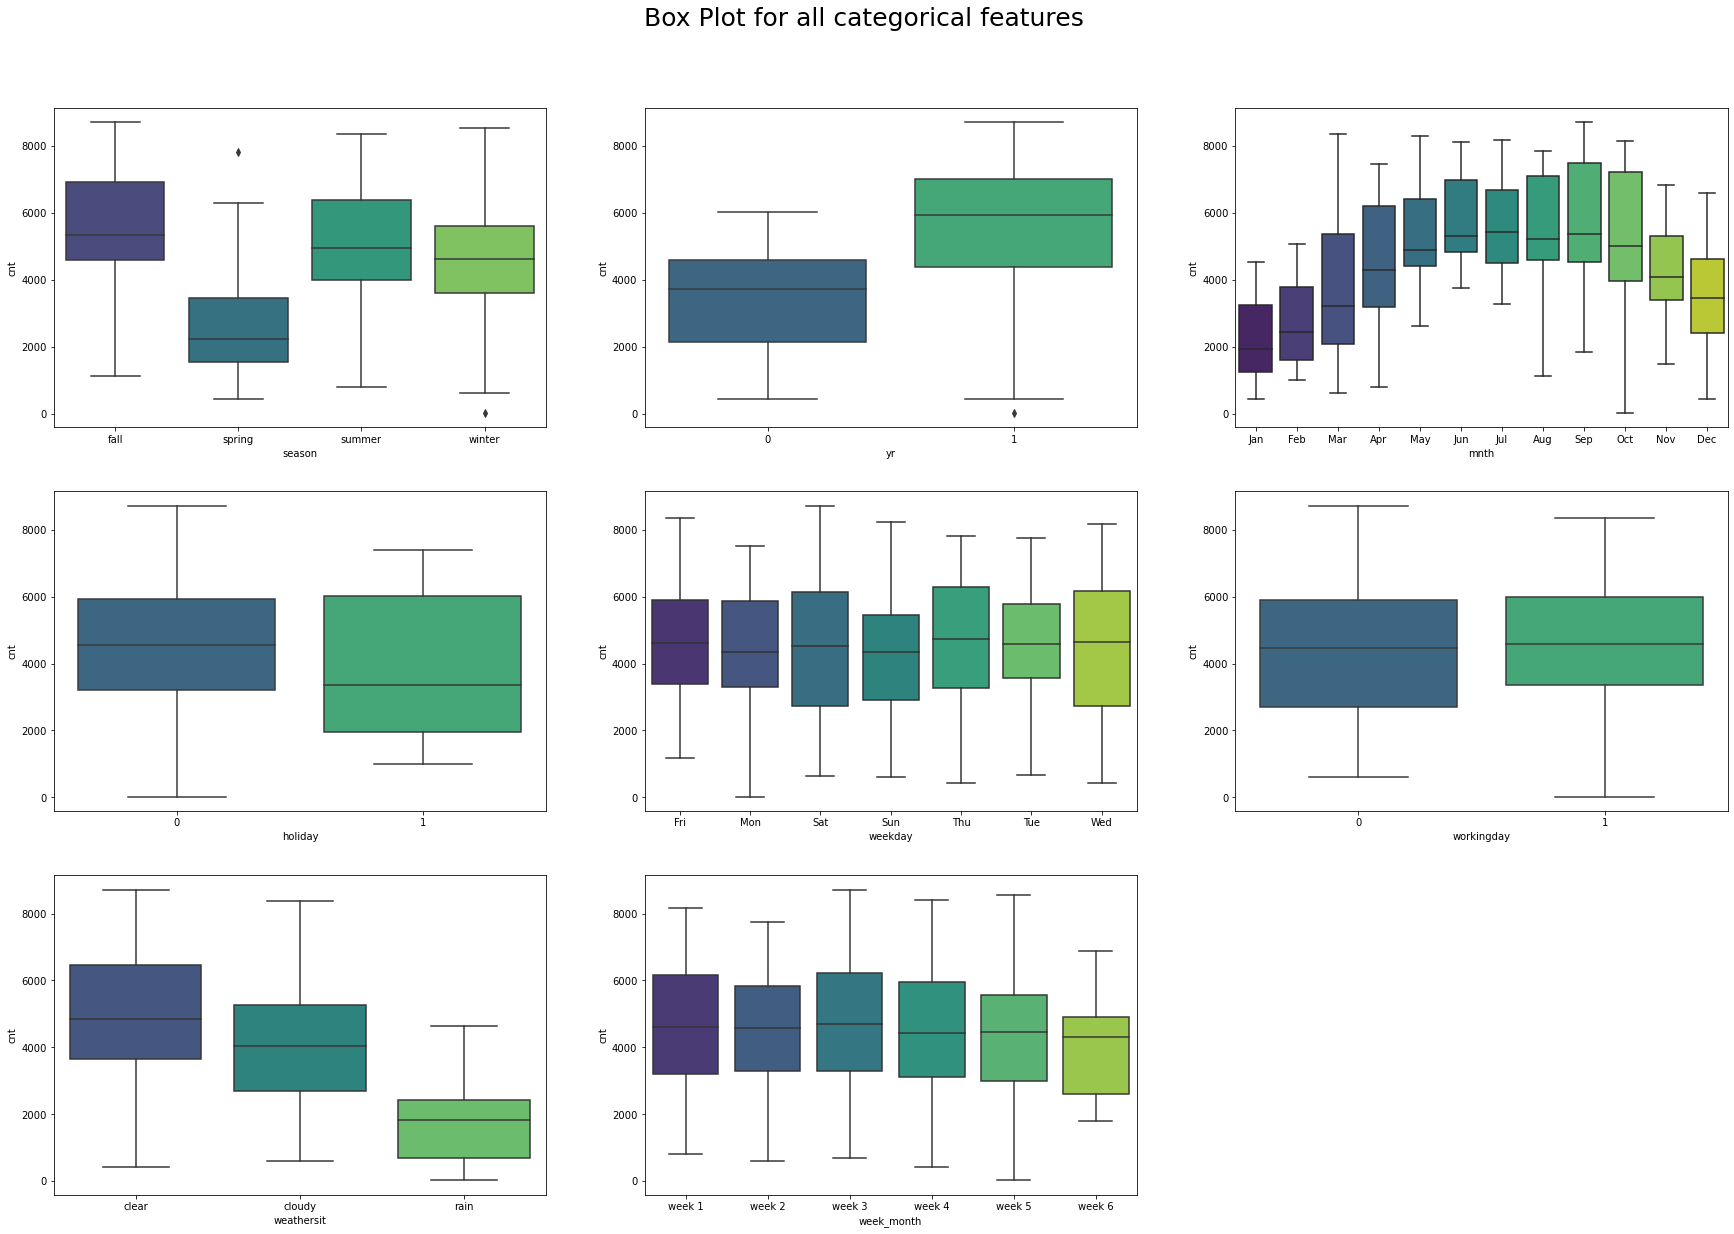

In [24]:
#visualising categorical variables in our dataset with count
plt.figure(figsize=(30, 20))

# iterate over each column and plot a box plot
for i,v in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = v , y = 'cnt', data = df,palette='viridis')
plt.suptitle("Box Plot for all categorical features",size=25,y=0.95)
plt.show()

In [25]:
# copy original dataset to temp dataset for visualization purpose
df_temp = df.copy()
# change date format
df_temp.dteday = pd.to_datetime(df_temp.dteday.dt.strftime('%d-%m'),format='%d-%m')
# create month locatore object
months_locator = mdates.MonthLocator()
# seperate the dataset based on year to temporary dataset
df_2018 = df_temp[df_temp['yr']==0]
df_2019 = df_temp[df_temp['yr']==1]

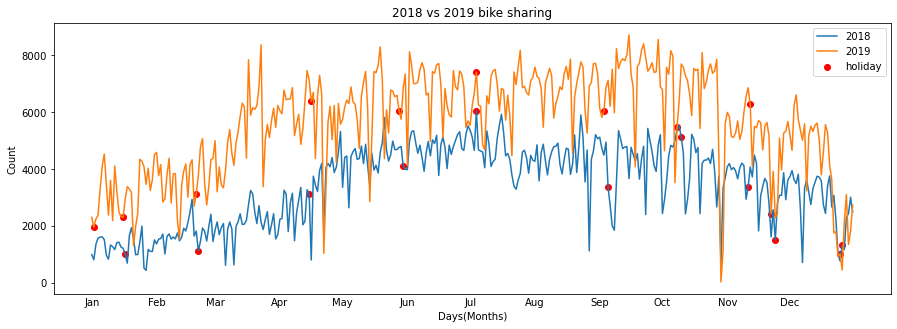

In [26]:
# create figure size
plt.figure(figsize=(15,5))

# creata scatter plot for plotinh holidays in months
plt.scatter('dteday','cnt',data=df_temp[df_temp['holiday']==1],c='r',label='holiday')

# plot the graph for the yaer 2018 and 2019 based on cnt on each day
plt.plot('dteday','cnt',data=df_2018,label='2018')
plt.plot('dteday','cnt',data=df_2019,label='2019')

# set the majorlocator to months instead of day
plt.gca().xaxis.set_major_locator(months_locator)

# set tick labels and length of ticks
plt.gca().set_xticklabels([calendar.month_abbr[i] for i in np.arange(1,13)])
plt.gca().tick_params(axis='x',length=0)

# plot legend title and lebels
plt.legend()
plt.title("2018 vs 2019 bike sharing")
plt.ylabel("Count")
plt.xlabel("Days(Months)")

# show plot
plt.show()

**Observation**

We can see that moslty when its a holiday the bike sharing is lower.

The bike sharing has increased in the year 2019 compared to its previous year

The trend looks alike on the increaseing and decreasing points over the period of time in a year

In [27]:
# define a method to plot graph for differnet years in a seperate plot
def plot_temp(temp_df,year):
    # create subplot with figuersize 15 width and 5 height
    plt.subplots(figsize=(15,5))
    
    # convert date object to number via matplotlib dates library
    x=mdates.date2num(temp_df.dteday)
    y=temp_df.cnt.values
    c=temp_df['atemp'].values
    
    # combine value of x and y to an array and Transform it to rows and reshape it to 3d array
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    
    # connect the point with next point in series to make a connect line between the scatter points.
    # ie paring the points to make each point to plot a line
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # plot the graph with color map and norm to set color scale for temperature
    lc = LineCollection(segments,cmap=plt.get_cmap('coolwarm'), norm=plt.Normalize(3.5, 42.5))
    
    # set the array with temperature values
    lc.set_array(c)
    
    # set the line width property
    lc.set_linewidth(2)
    ax=plt.gca()
    fig=plt.gcf()
    
    # add collection event to axis object
    ax.add_collection(lc)
    
    # create color bar for the line collection
    axcb = fig.colorbar(lc)
    
    # set min and max limit for x and y axis
    plt.xlim(min(x), max(x))
    plt.ylim(min(y), max(y))
    
    # set major locator and its format
    ax.xaxis.set_major_locator(months_locator)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    
    # set ticke labels for the major locators
    ax.set_xticklabels([calendar.month_abbr[i] for i in np.arange(1,13)])
    ax.tick_params(axis='x',length=0)

    # set title and labes 
    plt.title("Bikes booked for the Year "+year+" (colored in Actual Temperature)")
    plt.xlabel("Months")
    plt.ylabel("Booked count")
    axcb.set_label('Actual Temperature')
    
    # set the layout to fit
    plt.tight_layout()
    
    # show plot
    plt.show()

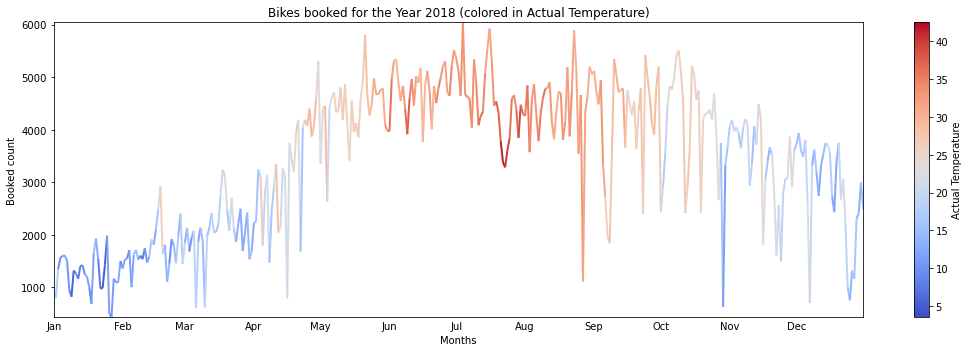

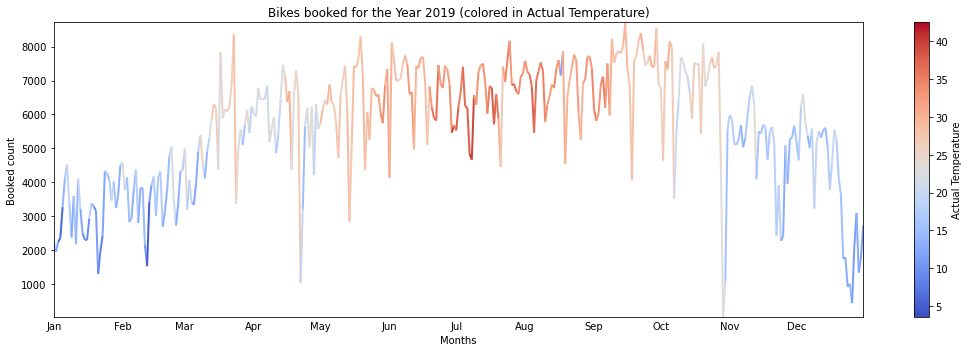

In [28]:
# plotting graphs
plot_temp(df_2018,'2018')
plot_temp(df_2019,'2019')

# **Observation**

We can see that when the bike sharing is comparitevly low  in lower temperature than in higher temperatures for the years 2018 and 2019

In [29]:
# delete dataframe that is not need to save memeory
del df_temp;
del df_2018;
del df_2019;

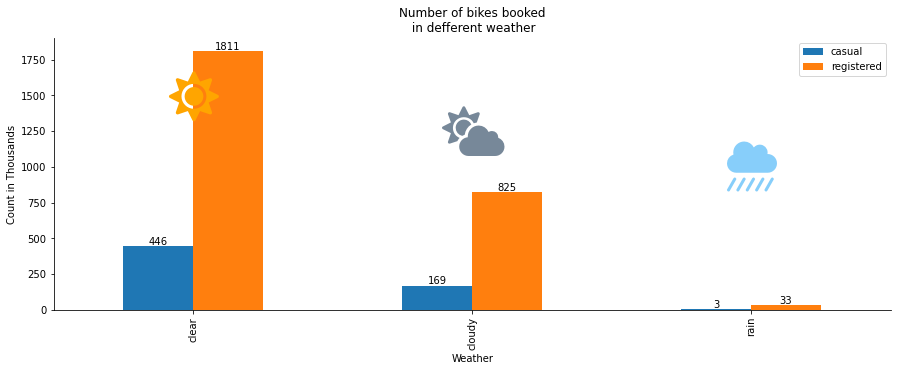

In [30]:
# count plot based on weather condition
_, ax = plt.subplots(figsize=(15,5))

# plot graph for weather vs count
(df.groupby('weathersit')[['casual','registered']].sum()/1000).plot(kind='bar',ax=ax)

# plot icons if font awesome exists
if font_exists:
    ax.text(0, 1500, "\uf185", fontproperties=fp, size=50, color="orange", ha="center", va="center")
    ax.text(1, 1250, "\uf6c4", fontproperties=fp, size=50, color="lightslategrey", ha="center", va="center")
    ax.text(2, 1000, "\uf740", fontproperties=fp, size=50, color="lightskyblue", ha="center", va="center")
else:
    print("please extract 'Font Awesome 5 Free-Solid-900.otf' from zip")

# remove borders    
sns.despine(top=True,right=True)

# set axis, labels and title
plt.ylabel("Count in Thousands")
plt.xlabel("Weather")
plt.title("Number of bikes booked\n in defferent weather")

# plot values for bars
for patch in ax.patches:
    ax.text(patch.get_x()+0.125,patch.get_height()+10,int(patch.get_height()),ha='center')

# show plot
plt.show();

**Observation**

The graph depicts that the bike sharing is less on rainy days and more on days in clear sky

In [31]:
# craete a temporary df for month data count
month_data = (df.groupby('mnth')['cnt'].sum()/1000).to_frame().reset_index()

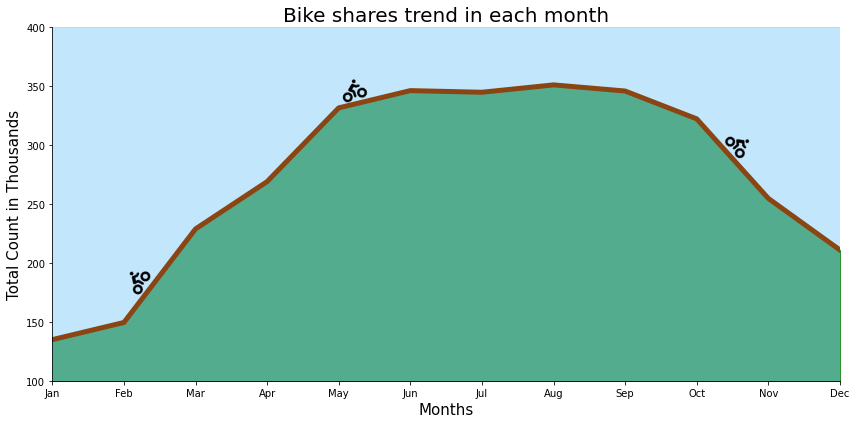

In [32]:
# create subplots
fig , ax = plt.subplots(figsize=(12,6))

# check if font awesome file exists
if font_exists:
    # plot the graph for total counts in month
    plt.plot(month_data['cnt'],linewidth=5,c='saddlebrown',zorder=1);
    
    # plot bike direction to indicate increase or decrease in trend
    ax.text(1,175,"\uf84a",rotation=60,fontproperties=fp,size=20)
    ax.text(4,338,"\uf84a",rotation=18,fontproperties=fp,size=20)
    ax.text(9.355,290,"\uf84a",rotation=-50,fontproperties=fp,size=20)
    
    # fill color below and above the slope
    ax.fill_between(month_data['mnth'],month_data['cnt'],color='forestgreen')
    ax.fill_between(month_data['mnth'],np.ones(len(month_data['mnth']))*400,color='lightskyblue',alpha=0.5)
    
    # remove margin spacing
    plt.margins(0,0)
else:
    print("please extract 'Font Awesome 5 Free-Solid-900.otf' from zip")
    # plot a normal graph
    plt.plot(month_data['cnt']);
    
# set liimit for y axis
ax.set_ylim(100,400)

# remove axis border
sns.despine(top=True,right=True)

# set axis labels and title
plt.ylabel("Total Count in Thousands",size=15)
plt.xlabel("Months",size=15)
plt.title("Bike shares trend in each month",size=20);

# set tick values
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels([calendar.month_abbr[i] for i in np.arange(1,13)]);
ax.set_yticks([100,150,200,250,300,350,400]);
ax.set_yticklabels([100,150,200,250,300,350,400]);
plt.tight_layout()

# show plot
plt.show()

<h3>Observation</h3>

The bike shares increases from Jan to May and starts decreasing from the month of September.

So we could say that the first half of the year undergoes a increase in bookings and after september the bike booking startes depleating

In [33]:
# delete the temporary dataframe
del month_data

In [34]:
sns.set_style('darkgrid')

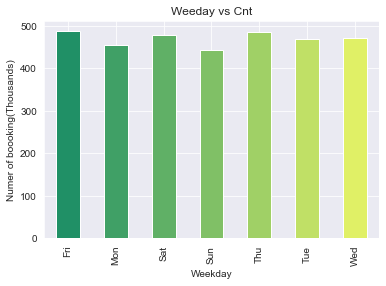

In [35]:
(df.groupby('weekday')['cnt'].sum()/1000).plot(kind='bar', color=list(sns.color_palette('summer',7)));
plt.title("Weeday vs Cnt")
plt.ylabel("Numer of boooking(Thousands)")
plt.xlabel("Weekday");

**Observation**

Weekday Doesn't show much difference so it can not be used for our model

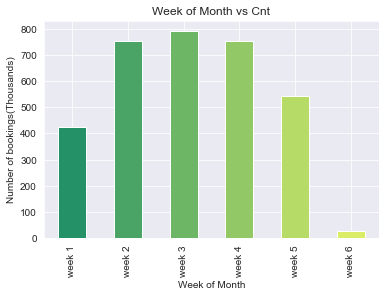

In [36]:
(df.groupby('week_month')['cnt'].sum()/1000).plot(kind='bar',color=list(sns.color_palette('summer',6)));
plt.title("Week of Month vs Cnt")
plt.ylabel("Number of bookings(Thousands)")
plt.xlabel("Week of Month");

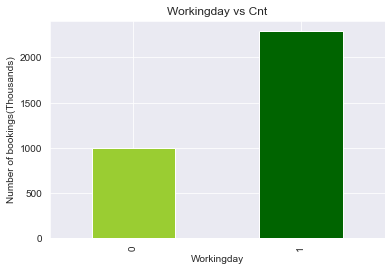

In [37]:
(df.groupby('workingday')['cnt'].sum()/1000).plot(kind='bar',color=['yellowgreen','darkgreen']);
plt.title("Workingday vs Cnt")
plt.ylabel("Number of bookings(Thousands)")
plt.xlabel("Workingday");

**Observation**

Bike booking is more on workingdays

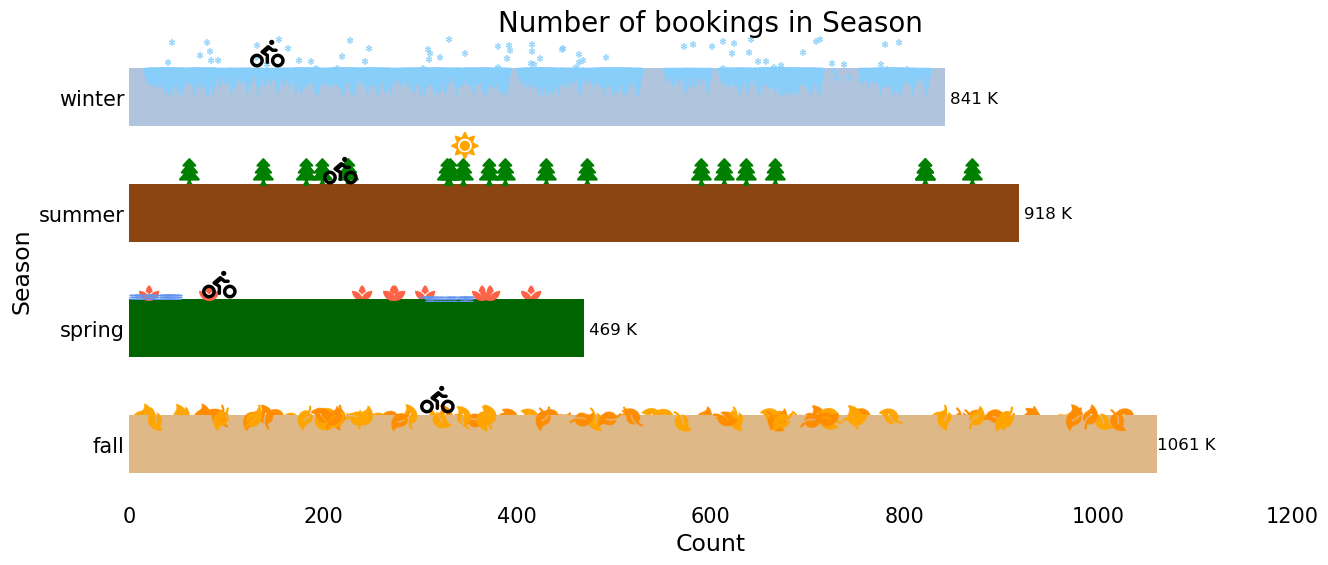

In [38]:
plt.style.use('default')

# creata subplot with figure size 15,6
fig , ax = plt.subplots(figsize=(15,6))

# create a plot for total count in season
(df.groupby('season')['cnt'].sum()/1000).plot(kind='barh',ax=ax,width=0.5,color=['burlywood','darkgreen','saddlebrown','lightsteelblue']);

# set x-axis limit
plt.xlim(0,1200)

# plot bar values 
for patch in ax.patches:
    ax.text(patch.get_width()+30,patch.get_y()+0.2,"{0:.0f} K".format(int(patch.get_width())),ha='center',size=12)
    
ax.tick_params(axis='both',labelsize=15,length=0)
plt.ylabel('Season',size=17)
plt.xlabel('Count',size=17)
plt.title('Number of bookings in Season',size=20)    

sns.despine(left=True,right=True,top=True,bottom=True)

if font_exists:
    ax.text(125,3.3,"\uf84a",fontproperties=fp,size=20)
    ax.text(200,2.29,"\uf84a",fontproperties=fp,size=20)
    ax.text(75,1.3,"\uf84a",fontproperties=fp,size=20)
    ax.text(300,0.3,"\uf84a",fontproperties=fp,size=20)
    
    ax.text(random.randrange(800),2.5,"\uf185",fontproperties=fp,size=20,color='orange')
    
    for i in np.arange(1,100):
        ax.text(random.randrange(800),3.06,"\uf7ad",fontproperties=fp,size=20,zorder=2,color='lightskyblue')
        ax.text(random.randrange(830),random.uniform(3.1, 3.5),"\uf2dc",fontproperties=fp,size=5,zorder=2,color='lightskyblue')
    for i in np.arange(1,20):
        ax.text(random.randrange(900),2.28,"\uf1bb",fontproperties=fp,size=20,zorder=random.randrange(2),color='g')
    for i in np.arange(1,10):
        ax.text(random.randrange(450),1.25,"\uf5bb",fontproperties=fp,size=13,zorder=random.randrange(2),color='tomato')
    for i in np.arange(1,50):        
        ax.text(random.randrange(50),1.25,"\uf773",fontproperties=fp,size=5,zorder=random.randrange(2),color='cornflowerblue')
        ax.text(random.randint(300, 350),1.235,"\uf773",fontproperties=fp,size=5,zorder=random.randrange(2),color='cornflowerblue')
    for i in np.arange(1,50):
        ax.text(random.randrange(1030),0.15,"\uf06c",rotation=random.randrange(360),fontproperties=fp,size=13,zorder=random.randrange(2),color='orange')
        ax.text(random.randrange(1030),0.15,"\uf06c",rotation=random.randrange(360),fontproperties=fp,size=13,zorder=random.randrange(2),color='darkorange')


**Drop casual and registered feature**

There is also a high correlation between registered and cnt. Since cnt is the sum of registered and casual we can drop these two features as well.

## Dropping the columns to Final Dataframe

We need to preserve the original dataset so we are dropping the columns and assigning it to a new dataframe

In [39]:
columns_to_drop.extend(['dteday','casual','registered'])
columns_to_drop

['temp', 'dteday', 'casual', 'registered']

In [40]:
# Droppping the columns as it is not required for our Predicting model
df_final = df.drop(columns=columns_to_drop).copy()

In [41]:
# change the oridnal categorical variable back to default category
df_final.mnth = df_final.mnth.astype('object').astype('category')

# Data Preparation

Before we start with our Regression model we have to fix our data for our regression model to fit the line for the feature values.

We have most of our data as categorical features which needs to be converted to numberical values. Factorizing the features wouldn't be good idea reather we could create dummy variables for the categorical columns

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
 11  week_month  730 non-null    category
dtypes: category(5), float64(3), int64(4)
memory usage: 44.9 KB


In [43]:
df_final.head()

season  yr mnth  holiday weekday  workingday weathersit     atemp      hum  \
0  spring   0  Jan        0     Sat           0     cloudy  18.18125  80.5833   
1  spring   0  Jan        0     Sun           0     cloudy  17.68695  69.6087   
2  spring   0  Jan        0     Mon           1      clear   9.47025  43.7273   
3  spring   0  Jan        0     Tue           1      clear  10.60610  59.0435   
4  spring   0  Jan        0     Wed           1      clear  11.46350  43.6957   

   windspeed   cnt week_month  
0  10.749882   985     week 1  
1  16.652113   801     week 1  
2  16.636703  1349     week 1  
3  10.739832  1562     week 1  
4  12.522300  1600     week 1

From the dataset we can see that season,mnth,weekday,weathersit has different levels that can be converted to dummy variables. 

In [44]:
# getting the list of dummy variables
dummy_vars = ['season','mnth','weekday','weathersit','week_month']

# creating dummy vairable for the selected categories
for feature in dummy_vars:
    # dropping the first column from the dummy feature as it would give an redundant correlation
    dummy = pd.get_dummies(df_final[feature],drop_first=True)
    df_final = pd.concat([df_final,dummy],axis=1)
df_final.head()

season  yr mnth  holiday weekday  workingday weathersit     atemp      hum  \
0  spring   0  Jan        0     Sat           0     cloudy  18.18125  80.5833   
1  spring   0  Jan        0     Sun           0     cloudy  17.68695  69.6087   
2  spring   0  Jan        0     Mon           1      clear   9.47025  43.7273   
3  spring   0  Jan        0     Tue           1      clear  10.60610  59.0435   
4  spring   0  Jan        0     Wed           1      clear  11.46350  43.6957   

   windspeed  ...  Thu Tue  Wed  cloudy  rain  week 2  week 3  week 4  week 5  \
0  10.749882  ...    0   0    0       1     0       0       0       0       0   
1  16.652113  ...    0   0    0       1     0       0       0       0       0   
2  16.636703  ...    0   0    0       0     0       0       0       0       0   
3  10.739832  ...    0   1    0       0     0       0       0       0       0   
4  12.522300  ...    0   0    1       0     0       0       0       0       0   

   week 6  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 39 columns]

We can now remove the original categorical features

In [45]:
# droping categorical features
df_final.drop(dummy_vars,axis=1,inplace=True)

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

WE have converted all our categorical data into numerical values with one-hot encoding. This will help in regression

# Prepare Dataset for Model

As the data is ready our first step is to perform test-train split

In [47]:
# to keep our trianing set split on same data set we can specify rand seed sonstant
np.random.seed(0)

# lets split our data set into 75% train and 25% test data
df_train, df_test = train_test_split(df_final,test_size=0.25,random_state=100) # specifying either on one size is enough

In [48]:
# preview the train set
df_train.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
311   0        0           1  20.61230  72.1667   4.625513  4205       0   
523   1        0           1  29.89310  46.7917  11.750661  7736       0   
381   1        0           1  18.21390  71.6087  23.391710  2935       1   
413   1        0           0  17.77125  53.4583  12.792243  4318       1   
253   0        0           0  30.46145  71.3750   7.708618  5046       0   

     summer  winter  ...  Thu  Tue  Wed  cloudy  rain  week 2  week 3  week 4  \
311       0       1  ...    0    1    0       0     0       1       0       0   
523       1       0  ...    0    0    0       0     0       1       0       0   
381       0       0  ...    0    1    0       1     0       0       1       0   
413       0       0  ...    0    0    0       0     0       0       0       1   
253       0       0  ...    0    0    0       0     0       0       1       0   

     week 5  week 6  
311       0       0  
523       0       0  
381       0       0  
413       0       0  
253       0       0  

[5 rows x 34 columns]

In [49]:
# preview the test set
df_test.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
184   0        1           0  33.27085  63.7917   5.459106  6043       0   
535   1        0           1  36.04875  59.2083   7.625404  6211       0   
299   0        0           1  22.85230  81.2917  13.250121  2659       0   
221   0        0           1  34.24915  42.4167  13.417286  4780       0   
152   0        0           1  32.19710  30.5000  19.583229  4968       0   

     summer  winter  ...  Thu  Tue  Wed  cloudy  rain  week 2  week 3  week 4  \
184       0       0  ...    0    0    0       1     0       1       0       0   
535       1       0  ...    0    0    1       0     0       0       0       1   
299       0       1  ...    1    0    0       1     0       0       0       1   
221       0       0  ...    0    0    1       0     0       1       0       0   
152       1       0  ...    1    0    0       0     0       0       0       0   

     week 5  week 6  
184       0       0  
535       0       0  
299       0       0  
221       0       0  
152       0       0  

[5 rows x 34 columns]

In [50]:
df_train.shape,df_test.shape

((547, 34), (183, 34))

## Scaling the features

we need to scale few features as they are not in a comaprable range. If we miss to scale the coefficeints obtained will be very large/small to other feature coeffiecients.

In [51]:
# create scaler object
scaler = MinMaxScaler()

# picking the features that has more varience in range
numerical_features = ['atemp','hum','windspeed','cnt']

# fitting the dataset to get min-max
scaler.fit(df_train[numerical_features])

# performing scaler transform
df_train[numerical_features] = scaler.transform(df_train[numerical_features])

In [52]:
# preview the scaled data in train set 
df_train[numerical_features].head()

atemp       hum  windspeed       cnt
311  0.437339  0.743667   0.057471  0.481247
523  0.680985  0.482181   0.286093  0.887483
381  0.374375  0.737917   0.659615  0.335136
413  0.362754  0.550880   0.319514  0.494248
253  0.695906  0.735509   0.156398  0.578003

In [53]:
# statisticl view of the scaled data in train set 
df_train[numerical_features].describe()

atemp         hum   windspeed         cnt
count  547.000000  547.000000  547.000000  547.000000
mean     0.511400    0.650673    0.319317    0.511382
std      0.211788    0.144515    0.169239    0.225008
min      0.000000    0.000000    0.000000    0.000000
25%      0.326287    0.538858    0.197844    0.350437
50%      0.521862    0.655216    0.294101    0.514266
75%      0.688457    0.753113    0.413761    0.682697
max      1.000000    1.000000    1.000000    1.000000

### Creating predictor X and Target variable y

In [54]:
# pop target varaible and set it to target training data set
y_train = df_train.pop('cnt')
# set the training data set for predictor variables
X_train = df_train

In [55]:
X_train.head()

yr  holiday  workingday     atemp       hum  windspeed  spring  summer  \
311   0        0           1  0.437339  0.743667   0.057471       0       0   
523   1        0           1  0.680985  0.482181   0.286093       0       1   
381   1        0           1  0.374375  0.737917   0.659615       1       0   
413   1        0           0  0.362754  0.550880   0.319514       1       0   
253   0        0           0  0.695906  0.735509   0.156398       0       0   

     winter  Aug  ...  Thu  Tue  Wed  cloudy  rain  week 2  week 3  week 4  \
311       1    0  ...    0    1    0       0     0       1       0       0   
523       0    0  ...    0    0    0       0     0       1       0       0   
381       0    0  ...    0    1    0       1     0       0       1       0   
413       0    0  ...    0    0    0       0     0       0       0       1   
253       0    0  ...    0    0    0       0     0       0       1       0   

     week 5  week 6  
311       0       0  
523       0       0  
381       0       0  
413       0       0  
253       0       0  

[5 rows x 33 columns]

In [56]:
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

## Feature Selection

In [57]:
# check the total number of features
len(df_train.columns)

33

we have 28 columns but we dont neeed all the columns to bild a good model it may lead to overfitting.

First lets build the linear regressor to find the intercept and coefficient and fit it to RFE

## Linear Regression Model

In [58]:
# Create linear Regression Model
lm = LinearRegression()

# fit the data to our model
lm.fit(X_train,y_train);

In [59]:
# view the intercept
lm.intercept_

235191408209.43735

In [60]:
# view the coefficients
lm.coef_

array([ 2.32353128e-01, -2.35191408e+11, -2.35191408e+11,  4.12257031e-01,
       -1.44523555e-01, -1.65644643e-01, -6.14319557e-02,  3.51014306e-02,
        1.04824847e-01,  4.47718885e-02, -5.66365199e-02, -3.30900358e-02,
       -6.59287458e-02, -1.17048131e-02,  3.26958057e-02,  4.81242286e-03,
        3.10528001e-02, -4.54675141e-02,  1.23014150e-02,  9.70566552e-02,
       -2.45998500e-02, -2.35191408e+11, -2.35191408e+11, -1.30905780e-02,
       -2.27933660e-02, -7.41576743e-03, -5.97664212e-02, -2.57586177e-01,
        1.19622554e-02,  3.20376437e-02,  8.89889881e-03, -9.21383277e-03,
        2.97813890e-03])

Lets create an **RFE** model to automate the feature selection for our dataset that helps us identify the features that has higher impact on our target variable. Using RFE we can reduce the number of features to **15**

# RFE

In [61]:
# create RFE for our Linear Regressor Model
rfe = RFE(lm,15)

# fit the train data to RFE
rfe = rfe.fit(X_train,y_train)

Lets view the feature rank the rank with number greater than one can be dropped which is shown in the selected column .ie the column selected is provided with a flag True is selected and false is rejected

In [62]:
# print the rank of each features
pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Feature','Selected','Rank']).sort_values('Rank')

Feature  Selected  Rank
0           yr      True     1
17         Nov      True     1
26      cloudy      True     1
27        rain      True     1
21         Sat      True     1
8       winter      True     1
7       summer      True     1
9          Aug      True     1
5    windspeed      True     1
4          hum      True     1
3        atemp      True     1
2   workingday      True     1
1      holiday      True     1
6       spring      True     1
19         Sep      True     1
10         Dec     False     2
12         Jan     False     3
11         Feb     False     4
22         Sun     False     5
14         Jun     False     6
16         May     False     7
29      week 3     False     8
31      week 5     False     9
13         Jul     False    10
20         Mon     False    11
18         Oct     False    12
23         Thu     False    13
24         Tue     False    14
25         Wed     False    15
28      week 2     False    16
30      week 4     False    17
15         Mar     False    18
32      week 6     False    19

In [63]:
# lest extract the selected columns by RFE
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Nov', 'Sep', 'Sat', 'cloudy', 'rain'],
      dtype='object')

In [64]:
# rejected columns suggested by RFE in our training data set
X_train.columns[~rfe.support_]

Index(['Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'week 2', 'week 3', 'week 4', 'week 5', 'week 6'],
      dtype='object')

## Build Model

Lets sort the columns based on correlation value to add the best correlated column to the model one by one

In [65]:
# creating a correlation list for the selected features with cnt(target variable) 
corr_cols = list(selected_columns)
corr_cols.append('cnt')
corr_cols = df_final[corr_cols].corr().iloc[:,-1:].sort_values('cnt',ascending=False).drop('cnt',axis=0)
corr_cols = corr_cols.reset_index()
corr_cols = corr_cols[corr_cols.cnt>0].append(corr_cols[corr_cols.cnt<0].sort_values('cnt'))

# preview the result
corr_cols

index       cnt
0        atemp  0.630685
1           yr  0.569728
2          Sep  0.194664
3          Aug  0.182100
4       summer  0.145325
5       winter  0.064619
6   workingday  0.062542
7          Sat  0.009012
14      spring -0.561702
13        rain -0.240602
12   windspeed -0.235132
11      cloudy -0.170686
10         hum -0.098543
9      holiday -0.068764
8          Nov -0.040344

### Build Model in Statsmodel API for detailed analysis

Now lets build this model for the selected features using Stats package

Creating predefind function to make it reusable code

**OLS model**

In [66]:
def build_model(X_train_rfe):
    # adding a constant variable for intercept
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Initialize an OLS model for our dataset and fit the data to model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    # view the summary of the model for selected features
    print(lm.summary())

    return lm

### VIF Analysis
The VIF score should be below 5 for a good model so lets remove the features one by one

In [67]:
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame()
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns
    
    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # print vif table
    display(vif)
    
    # retrun vif object
    return vif

## Selecting an Approach to build the model

We have two way to build a model to find the best features selected by RFE that would fit.
<ul><li>Dropping a feature one by one from the model built with 15 features until it shows good performane without overfitting</li><li>Adding a feature one by one to the model until it shows a good performance metrics</li></ul>

Lets add features one by one and build our model

# Logic to build with best features

Lets create a custom logic based on the below condition

<table>
<tr><th style="text-align:center">Order</th><th style="text-align:center">P-value</th><th style="text-align:center">VIF</th><th style="text-align:center">Action</th></tr>
<tr><td>1</td><td>High</td><td>High</td><td>Drop these columns First</td></tr>
<tr><td>2</td><td>High</td><td>Low</td><td>Drop these columns one by one, because this could lower the VIF values of other columns to prevent it from being dropped in next step </td></tr>
<tr><td>3</td><td>Low</td><td>High</td><td>Drop the colums with VIF greater than 5</td></tr>
<tr><td>4</td><td>Low</td><td>Low</td><td>Keep these features</td></tr>
</table>	

In [68]:
# create a empty data frame for xtrain and vif
X_train_rfe = pd.DataFrame()
vif = pd.DataFrame()

# creating this object to ignore vif for a single feature
count = 1

# created this varible to stop the outer loop of adding futher features for model
stop = False

# iteratre over the columns in order
for i,v in corr_cols.iterrows():
    
    # extract the first column name to be added
    col = v.values[0]
    
    # add the column to the traing data set
    X_train_rfe[col] = X_train[col]
    
    # rebuild the model again to ckeck for high vifs and p-values 
    # once a feature is dropped on the above conditions after adding 
    # the new feature from the previous step to the model
    while True:
        # build the model
        lm = build_model(X_train_rfe)
        
        # ignore vif and p-value check since there will
        # be only 1 column on first iteration
        if count != 1:
            
            # calculate VIF
            vif = VIF(X_train_rfe)

            # if the model reaches required r2 score stop the model from executing furher steps
            if lm.rsquared >= 0.80:
                stop = True
                break
            
            # Check if the p-value if high
            if (lm.pvalues > 0.05).sum() > 0:
                
                # extract feature fo high p-value
                feature = lm.pvalues[lm.pvalues > 0.05].index
                
                # check if this feature is not const
                if feature[0] != 'const':
                    
                    # if the VIF value is aslo high drop this columns first
                    if feature[0] in vif.loc[vif.VIF > 5,'Features']:
                        X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 1
                    else:
                        # if only the p-value is high drop it
                        X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 2
                
                # if the p-value column is 2nd in the list extract 
                # that feature name to drop if from dataset if there is 
                # a third value with high p-value it will be
                # validated in the next loop after rebuild on dropping the current feature
                elif (feature[0] == 'const') & (len(feature) > 1):
                    X_train_rfe.drop(feature[1],axis=1,inplace=True)                    # order 2
            
            # if VIF value is high drop it
            if (vif.VIF > 5).sum() > 0:
                X_train_rfe.drop(vif.loc[vif.VIF > 5,'Features'],axis=1,inplace=True)   # order 3
            else:
                break                                                                   # order 4
        else:
            break
    # stop the process
    if stop:
        break
    
    # increment count on adding new feature
    count = count + 1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     401.9
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.22e-67
Time:                        10:13:53   Log-Likelihood:                 191.33
No. Observations:                 547   AIC:                            -378.7
Df Residuals:                     545   BIC:                            -370.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1574      0.019      8.238      0.0

Features   VIF
0    atemp  1.87
1       yr  1.87

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     422.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.50e-141
Time:                        10:13:53   Log-Likelihood:                 369.67
No. Observations:                 547   AIC:                            -731.3
Df Residuals:                     543   BIC:                            -714.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.015      4.547      0.0

Features   VIF
0    atemp  2.02
1       yr  1.87
2      Sep  1.13

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     316.4
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          3.22e-140
Time:                        10:13:53   Log-Likelihood:                 369.71
No. Observations:                 547   AIC:                            -729.4
Df Residuals:                     542   BIC:                            -707.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.015      4.361      0.0

Features   VIF
0    atemp  2.36
1       yr  1.88
3      Aug  1.24
2      Sep  1.16

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     323.4
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          5.18e-142
Time:                        10:13:53   Log-Likelihood:                 373.89
No. Observations:                 547   AIC:                            -737.8
Df Residuals:                     542   BIC:                            -716.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.014      4.409      0.0

Features   VIF
0    atemp  2.50
1       yr  1.87
3   summer  1.42
2      Sep  1.19

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     325.8
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.44e-160
Time:                        10:13:53   Log-Likelihood:                 420.17
No. Observations:                 547   AIC:                            -828.3
Df Residuals:                     541   BIC:                            -802.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.014      0.617      0.5

Features   VIF
0    atemp  2.78
1       yr  1.90
3   summer  1.53
4   winter  1.29
2      Sep  1.19

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     274.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          2.75e-160
Time:                        10:13:53   Log-Likelihood:                 422.50
No. Observations:                 547   AIC:                            -831.0
Df Residuals:                     540   BIC:                            -800.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.015     -0.243      0.8

Features   VIF
0       atemp  3.79
5  workingday  2.61
1          yr  1.93
3      summer  1.54
4      winter  1.32
2         Sep  1.19

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     240.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          3.41e-161
Time:                        10:13:53   Log-Likelihood:                 427.52
No. Observations:                 547   AIC:                            -839.0
Df Residuals:                     539   BIC:                            -804.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0278      0.017     -1.621      0.1

Features   VIF
0       atemp  4.57
5  workingday  3.38
1          yr  1.95
3      summer  1.55
6         Sat  1.48
4      winter  1.36
2         Sep  1.19

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     215.4
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          2.74e-162
Time:                        10:13:53   Log-Likelihood:                 432.93
No. Observations:                 547   AIC:                            -847.9
Df Residuals:                     538   BIC:                            -809.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0632      0.033      1.944      0.0

Features   VIF
0       atemp  4.69
5  workingday  4.33
1          yr  2.05
3      summer  1.73
6         Sat  1.73
7      spring  1.64
4      winter  1.54
2         Sep  1.22

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     237.7
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          6.72e-181
Time:                        10:13:53   Log-Likelihood:                 479.52
No. Observations:                 547   AIC:                            -939.0
Df Residuals:                     537   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0787      0.030      2.628      0.0

Features   VIF
0       atemp  4.69
5  workingday  4.35
1          yr  2.05
6         Sat  1.74
3      summer  1.73
7      spring  1.64
4      winter  1.56
2         Sep  1.22
8        rain  1.05

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     224.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.95e-184
Time:                        10:13:53   Log-Likelihood:                 490.69
No. Observations:                 547   AIC:                            -959.4
Df Residuals:                     536   BIC:                            -912.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1260      0.031      4.061      0.0

Features   VIF
0       atemp  5.31
9   windspeed  4.48
5  workingday  4.40
7      spring  2.20
1          yr  2.06
3      summer  1.95
6         Sat  1.76
4      winter  1.70
2         Sep  1.23
8        rain  1.06

The iteration stops when the model reaches above 0.8 but on the last loop of iteration we can see that atemp VIF increased above 5 once the feature windspeed was added, so instead of dropping atemp lets drop **windspeed** as atemp has higher impact/explaenation to the model.
And Lets add the next feature from the corr_cols list

## Manual Feature selection testing

In [69]:
try:
    # dropping windspeed as it influenses other variable's VIF with less contribution on model output
    X_train_vif = X_train_rfe.drop('windspeed',axis=1)
except:
    print("windspeed is not available in the train dataset")    

Lets add the next feature after windspeed from the corr_cols which is **cloudy**

In [70]:
# adding cloudy to the dataset for testing the model output
X_train_vif['cloudy'] = X_train['cloudy']

In [71]:
# build the model
lm1 = build_model(X_train_vif);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     255.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.11e-196
Time:                        10:13:53   Log-Likelihood:                 519.56
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     536   BIC:                            -969.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.028      3.773      0.0

In [72]:
# check the VIF for our new model
_ = VIF(X_train_vif)

Features   VIF
0       atemp  4.71
5  workingday  4.40
1          yr  2.05
3      summer  1.78
6         Sat  1.75
7      spring  1.69
4      winter  1.61
9      cloudy  1.58
2         Sep  1.24
8        rain  1.07

**Observation**

The model has a good r-square value but it feels like we have overfitted the model with too much columns lets try to remove two columns from the training dataset

## Dropping few columns to prevent overfitting of the model

lets try some manual dropping as **trial and error** method to see if dropping these columns does not affect the model and provided decent output.



we have three freatures from same category in our final model **summer, winter and spring**. It would be fine to drop one of them

In [73]:
try:
    # dropping summer to the dataset for testing the model output
    X_train_vif1 = X_train_vif.drop('summer',axis=1)

    #rebuild model
    lm2 = build_model(X_train_vif1)

    # check the VIF for our new model
    _ = VIF(X_train_vif1)
except:
    print("summer is not available in the train dataset")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     278.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          9.27e-196
Time:                        10:13:53   Log-Likelihood:                 514.48
No. Observations:                 547   AIC:                            -1009.
Df Residuals:                     537   BIC:                            -965.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1588      0.023      7.008      0.0

Features   VIF
0       atemp  4.49
4  workingday  4.18
1          yr  2.04
5         Sat  1.70
8      cloudy  1.54
6      spring  1.49
3      winter  1.38
2         Sep  1.15
7        rain  1.07

**Observation**

The model give a decent R-square even after dorpping so lets pick another feature to drop

In [74]:
try:
    # dropping winter from the dataset for testing the model output
    X_train_vif2 = X_train_vif1.drop('winter',axis=1)

    # rebuild model
    lm3 = build_model(X_train_vif2)

    # check the VIF for our new model
    _ = VIF(X_train_vif2)
except:
    print("winter is not available in the train dataset")    

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     300.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          7.49e-193
Time:                        10:13:53   Log-Likelihood:                 504.69
No. Observations:                 547   AIC:                            -991.4
Df Residuals:                     538   BIC:                            -952.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2180      0.019     11.725      0.0

Features   VIF
0       atemp  4.48
3  workingday  3.95
1          yr  2.01
4         Sat  1.63
7      cloudy  1.52
5      spring  1.38
2         Sep  1.15
6        rain  1.05

In [75]:
X_train_vif2.shape

(547, 8)

**Observation**

The model looks good with 8 features , the **r-Square** value is above 0.8 which i assume to be a good model and on comparing the value of **F-Staticstics** it has a good value compared to other models.

Wiith this final model lets proceed to Prediction and residual analysis.

# Final Model

Now we need to know if the error terms are normally distributed lets plot a histogram and check

## Using Sklearn library for prediction

For Prediction and error we can use **Sklearn** model as it has many validation terms.

We already know the best features for our model which was derieved from our best model **lm3** so we can take and use features  from that model with X_train_vif2 as final data set

In [76]:
# creating linar regressor
lm_final = LinearRegression()

# Initializing our model with the best features for prediction
# which was obtained from lm3 model
lm_final.fit(X_train_vif2,y_train)

# Predcting values in our train data set
y_train_pred = lm_final.predict(X_train_vif2)

### Prediction and Residual Analysis for the final model on Trainset

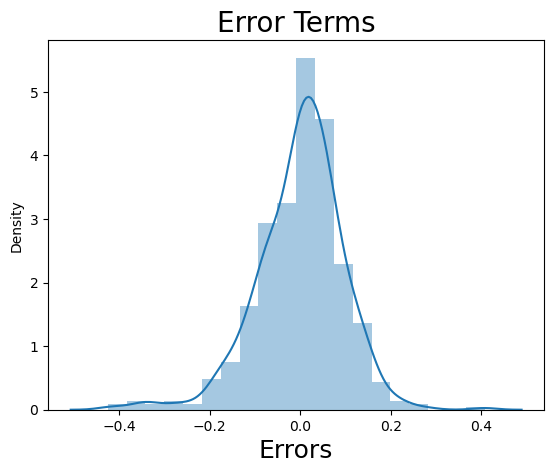

In [77]:
# Plot the histogram for the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
# set title for plot
plt.title('Error Terms', fontsize = 20)                  
# set x-axis label
plt.xlabel('Errors', fontsize = 18)                     
plt.show()

In [78]:
print('Intercept:', lm_final.intercept_)
print('Coefficients:', lm_final.coef_)
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_train, y_train_pred)))

Intercept: 0.21797878504962542
Coefficients: [ 0.38802653  0.23451366  0.06951441  0.05649789  0.06279728 -0.16235781
 -0.29432764 -0.0779583 ]
Mean squared error (MSE): 0.01
Coefficient of Determination (R2): 0.82


# Validating model on testset

In [79]:
# Scaling test datset
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [80]:
# Extracting target column
y_test = df_test.pop('cnt')

# taking predictor feactures for test set
X_test = df_test

In [81]:
# filetiring our test data set with the best columns for prediction
X_test_vif = X_test[X_train_vif2.columns]

In [82]:
# making prediction on the final model
y_test_pred = lm_final.predict(X_test_vif)

## Model evaluation on testset

In [86]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
99     0.330534
515    0.841694
225    0.436954
195    0.634607
189    0.611367
Name: cnt, Length: 183, dtype: float64

Text(0, 0.5, 'y_test_pred')

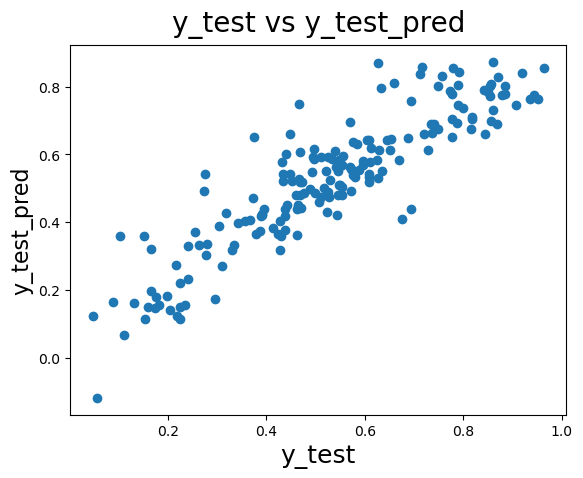

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
# Plot title 
plt.title('y_test vs y_test_pred', fontsize=20,pad=10)
# plot X-label and y-label
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)    

In [84]:
print('Trainset Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Trainset Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_train, y_train_pred)))
print('\nTestset Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testset Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_test, y_test_pred)))

Trainset Mean squared error (MSE): 0.01
Trainset Coefficient of Determination (R2): 0.82

Testset Mean squared error (MSE): 0.01
Testset Coefficient of Determination (R2): 0.80


In [85]:
# lm3 is the best model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     300.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          7.49e-193
Time:                        10:13:53   Log-Likelihood:                 504.69
No. Observations:                 547   AIC:                            -991.4
Df Residuals:                     538   BIC:                            -952.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2180      0.019     11.725      0.0

<h1> Model Conslusion </h1><br>
<h2>
Train r2 score : 0.82<br>    
    
Test r2 score : 0.80
</h2>
<h3>
We can conclude with the best fit line as:
</h3>
<h4>    
cnt= const * 0.218 + atemp * 0.3880 + yr * 0.2345 + Sep * 0.0695 + workingday * 0.0565 + Sat * 0.0628 + spring * -0.1624 + rain * -0.2943 + cloudy * -0.0780
</h4>

The demand of bikes is mainly influenced by actual temperature,year, september, workingday, saturday.<br><br>
The demand of bikes mostly decreases with attributes spring, light rain/light snow and cloudy